In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read input file
df = pd.read_csv('Titanic-Dataset.csv')
# check if the read correctly
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

### Imputation

1. **Drop Row:** Remove rows that contain missing values.

    **When appropriate:**
      - Missing percentage is small (e.g., <5%)
      - Data is Missing Completely At Random (MCAR)
      - Dataset is large enough that losing rows won’t hurt model performance

      **Example:**
      ```python
      df = df.dropna()
      ```


2. **Drop Column (Feature Removal):** Remove a feature if a large portion of its values are missing.

    **When appropriate:**
    - Missing rate is very high (e.g., >40–50%)
    - Feature has low predictive importance
    - Imputation would introduce too much noise

    **Example:**
    ```python
    df = df.drop(columns=[])
    ```

In [94]:
df = pd.read_csv('Titanic-Dataset.csv')
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [95]:
# drop feature 'Cabin'
df = df.drop('Cabin', axis=1)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C


3. **Mean Imputation (Numerical):**  Replace missing values with the mean of the feature.

    **When appropriate:**
    - Data is approximately symmetric (normally distributed)
    - Missing percentage is small
    - No extreme outliers present
    - Feature variance should be preserved reasonably

    **Example:**
    ```python
    df['feature'] = df['feature'].fillna(df['feature'].mean())
    ```


4. **Median Imputation (Numerical):**  Replace missing values with the median of the feature.

    **When appropriate:**
    - Data is skewed
    - Outliers are present
    - Robust central tendency is preferred

    **Example:**
    ```python
    df['feature'] = df['feature'].fillna(df['feature'].median())
    ```


5. **Constant Value Imputation (Numerical or Categorical):**  Replace missing values with a fixed value such as 0, -1, or "Unknown".

    **When appropriate:**
    - Missing itself carries signal
    - Using tree-based models
    - Feature has meaningful zero baseline

    **Risks:**
    - May introduce artificial clusters

    **Example (Numerical):**
    ```python
    df['feature'] = df['feature'].fillna(0)
    ```

    **Example (Categorical):**
    ```python
    df['category'] = df['category'].fillna("Unknown")
    ```


6. **Mode Imputation (Categorical):**  Replace missing values with the most frequent category.

    **When appropriate:**
    - Feature is categorical
    - Missing percentage is small
    - One category clearly dominates

    **Risks:**
    - Can inflate majority class

    **Example:**
    ```python
    df['category'] = df['category'].fillna(df['category'].mode()[0])
    ```


In [96]:
# Use Mean Imputation for Age
df['Age'] = df['Age'].fillna(df['Age'].mean())
# Use Mode Imputation for Age
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Can also be performed of scikit-learn library**

```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='most_frequest')
df['Age'] = imputer.fit_transform(df[['Age']])
```

7. **K-Nearest Neighbors (KNN) Imputation:**  Replace missing values using the mean (or median) of the nearest neighbors.

    **When appropriate:**
    - Relationships exist between features
    - Dataset size is moderate
    - Missing percentage is not extremely high
    - Features are properly scaled

    **Advantages:**
    - Uses similarity between observations
    - Preserves feature relationships better than mean/median

    **Risks:**
    - Computationally expensive
    - Sensitive to feature scaling
    - Can perform poorly with high dimensional data

    **Example:**
    ```python
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=5)
    df_imputed = imputer.fit_transform(df)
    ```

8. **Iterative Imputation (MICE - Multiple Imputation by Chained Equations):**  Model each feature with missing values as a function of other features and iteratively estimate missing values.

    **When appropriate:**
    - Complex relationships between variables
    - Moderate missing percentage
    - Higher modeling accuracy is required

    **Advantages:**
    - Captures multivariate relationships
    - Often more accurate than simple imputation

    **Risks:**
    - More computationally expensive
    - Can overfit if not careful
    - Assumes relationships are correctly modeled

    **Example:**
    ```python
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    imputer = IterativeImputer(random_state=42)
    df_imputed = imputer.fit_transform(df)
    ```

9. **Missing Indicator Method:**  Create a binary feature indicating whether a value was missing, then apply another imputation method.

    **When appropriate:**
    - Missingness itself carries predictive signal
    - Used in credit risk, healthcare, and tabular ML
    - Want model to learn missing patterns

    **Advantages:**
    - Preserves missingness information
    - Improves tree-based model performance

    **Risks:**
    - Adds extra feature
    - May not help if missingness is random

    **Example:**
    ```python
    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(add_indicator=True)
    df_imputed = imputer.fit_transform(df)
    ```


### Feature Scaling - Standardization (Z-score Normalization)

* Standardization transforms a variable so that it has a mean of 0 and a standard deviation of 1.

$$
Z = \frac{X_i - \mu}{\sigma}
$$

**Definitions:**

- $X_i$ : Individual data point
- $\mu$ : Mean of the feature  
- $\sigma$ : Standard deviation of the feature  

**Resulting Distribution:**

- $\mathbb{E}[Z] = 0$  
- $\text{Std}(Z) = 1$


In [97]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
441,442,0,3,"Hampe, Mr. Leon",male,20.000000,0,0,345769,9.50,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.000000,0,0,113792,26.55,S
648,649,0,3,"Willey, Mr. Edward",male,29.699118,0,0,S.O./P.P. 751,7.55,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.00,S
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.000000,0,0,233639,13.00,S


In [98]:
df_new = df[['Age','Fare','Survived']]

In [99]:
df_new.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Survived', axis=1),
                                                    df_new['Survived'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
scaler.mean_

array([29.87334388, 32.45827255])

In [108]:
X_train

,Age,Fare
857,51.000000,26.5500
52,49.000000,76.7292
386,1.000000,46.9000
124,54.000000,77.2875
578,29.699118,14.4583
...,...,...
835,39.000000,83.1583
192,19.000000,7.8542
629,29.699118,7.7333
559,36.000000,17.4000


In [104]:
X_train_scaled

array([[ 1.62393675, -0.12253019],
       [ 1.47020331,  0.91812372],
       [-2.21939923,  0.29950338],
       ...,
       [-0.0133922 , -0.51276504],
       [ 0.47093596, -0.31228976],
       [ 2.31573723,  0.13566725]])

In [106]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [107]:
X_train_scaled

,Age,Fare
0,1.623937,-0.122530
1,1.470203,0.918124
2,-2.219399,0.299503
3,1.854537,0.929702
4,-0.013392,-0.373297
...,...,...
618,0.701536,1.051455
619,-0.835798,-0.510258
620,-0.013392,-0.512765
621,0.470936,-0.312290


In [111]:
np.round(X_train.describe(), 1)

,Age,Fare
count,623.0,623.0
mean,29.9,32.5
std,13.0,48.3
min,0.7,0.0
25%,23.0,7.9
50%,29.7,15.0
75%,36.0,31.4
max,80.0,512.3


In [112]:
np.round(X_train_scaled.describe(), 1)

,Age,Fare
count,623.0,623.0
mean,0.0,0.0
std,1.0,1.0
min,-2.2,-0.7
25%,-0.5,-0.5
50%,-0.0,-0.4
75%,0.5,-0.0
max,3.9,10.0


#### Effect of Scaling

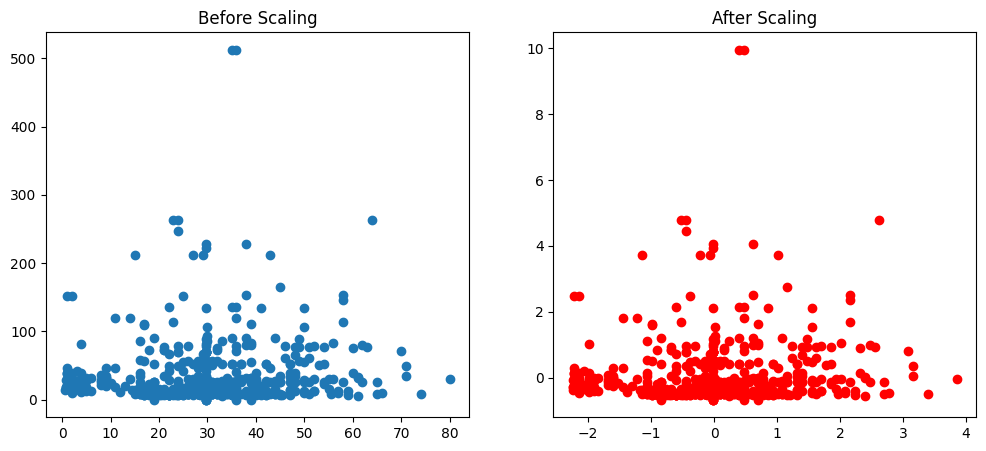

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['Fare'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['Fare'],color='red')
ax2.set_title("After Scaling")
plt.show()

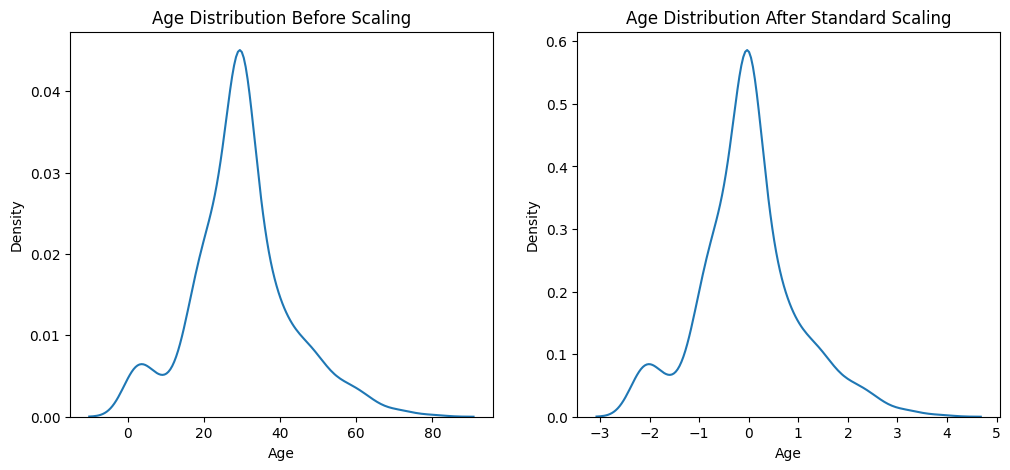

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

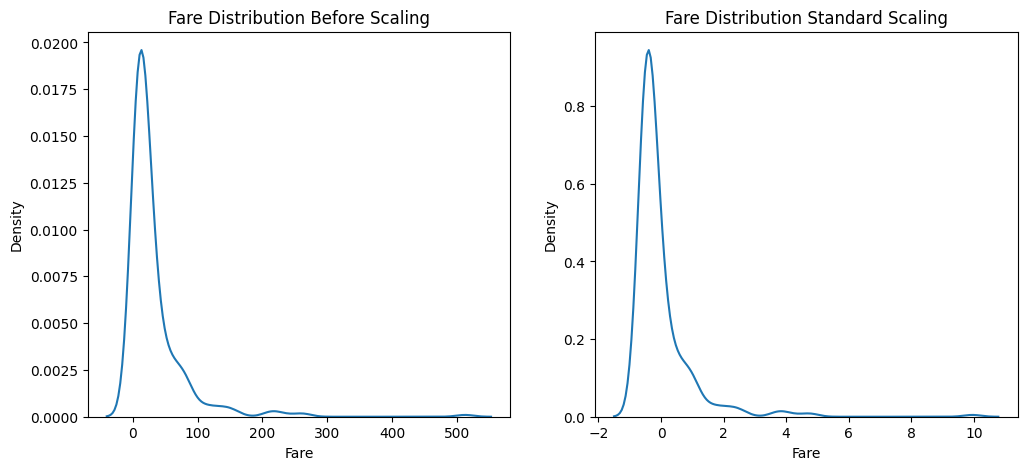

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Fare Distribution Before Scaling')
sns.kdeplot(X_train['Fare'], ax=ax1)

# after scaling
ax2.set_title('Fare Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['Fare'], ax=ax2)
plt.show()

### Categorical Feature Encoding

1. **One-Hot Encoding (Nominal Data):**  Convert each category into a separate binary column.

    **When appropriate:**
    - Feature is nominal (no inherent order)
    - Number of unique categories is relatively small
    - Linear models are being used

    **Examples of Nominal Data:**
    - Ocean proximity
    - City names
    - Product categories

    **Advantages:**
    - No ordinal assumptions introduced
    - Works well with linear models

    **Risks:**
    - Increases dimensionality
    - Can cause multicollinearity (dummy variable trap)

    **Example:**
    ```python
    from sklearn.preprocessing import OneHotEncoder

    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(df[['category']])
    ```

2. **Ordinal Encoding (Ordinal Data):**  Assign ordered integers to categories that have a meaningful ranking.

    **When appropriate:**
    - Feature has a natural order
    - Order matters in modeling

    **Examples of Ordinal Data:**
    - Education level (High School < Bachelor < Master < PhD)
    - Customer satisfaction (Low < Medium < High)
    - Grades (C < B < A)

    **Advantages:**
    - Preserves order information
    - Lower dimensionality than one-hot

    **Risks:**
    - Model may assume equal spacing between categories

    **Example:**
    ```python
    from sklearn.preprocessing import OrdinalEncoder

    encoder = OrdinalEncoder()
    df['grade_encoded'] = encoder.fit_transform(df[['grade']])
    ```

3. **Label Encoding (Target Encoding for y):**  Convert target class labels into numeric form.

    **When appropriate:**
    - Encoding target variable (y)
    - Classification problems

    **Example:**
    ```python
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    ```

    **Note:**  
    LabelEncoder should generally be used only for the target variable, not input features.


#### One Hot Encoding

In [173]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [188]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=np.int32, sparse_output=False)
# ohe = OneHotEncoder(drop='first', dtype=np.int32)

In [189]:
ohe.fit_transform(df[['Sex','Embarked']])

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0]], dtype=int32)

In [190]:
df_ohe = ohe.fit_transform(df[['Sex','Embarked']])

In [191]:
df_ohe.shape

(891, 5)

In [192]:
df_ohe

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0]], dtype=int32)

In [179]:
df_ohe_new = np.hstack((df.values,df_ohe))

In [180]:
df_ohe_new

array([[1, 0, 3, ..., 0, 0, 1],
       [2, 1, 1, ..., 1, 0, 0],
       [3, 1, 3, ..., 0, 0, 1],
       ...,
       [889, 0, 3, ..., 0, 0, 1],
       [890, 1, 1, ..., 1, 0, 0],
       [891, 0, 3, ..., 0, 1, 0]], dtype=object)

#### Ordinal Encoding

In [133]:
df_pclass = df['Pclass'].astype(str)
df_pclass

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [134]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['3','2','1']])
oe.fit(df_pclass.values.reshape(-1,1))

OrdinalEncoder(categories=[['3', '2', '1']])

In [135]:
df_pclass = oe.transform(df_pclass.values.reshape(-1,1))

In [136]:
df_pclass[-5:]

array([[1.],
       [2.],
       [0.],
       [2.],
       [0.]])

### Column Tranformer

In [193]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['3','2','1']]),['Pclass']),
    ('tnf2',OneHotEncoder(sparse_output=False, drop='first'),['Sex','Embarked'])
],remainder='passthrough')

In [194]:
transformer.fit_transform(df).shape

ValueError: Unsorted categories are not supported for numerical categories

In [195]:
df['Pclass'] = df['Pclass'].astype(str)

In [196]:
transformer.fit_transform(df).shape

(891, 12)

## Pipeline

In [197]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression

In [198]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [200]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
803,1,3,male,0.42,0,1,8.5167,C
778,0,3,male,NaN,0,0,7.7375,Q
520,1,1,female,30.00,0,0,93.5000,S
693,0,3,male,25.00,0,0,7.2250,C
111,0,3,female,14.50,1,0,14.4542,C


In [204]:
df['Pclass'] = df['Pclass'].astype(str)

In [205]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [208]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)


In [209]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ordinal_features = ['Pclass']
ordinal_transformer = Pipeline(steps=[
    ('oe', OrdinalEncoder(categories=[['3','2','1']]))
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [211]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [212]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [213]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('ord',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(categories=[['3',
                                                                                               '2',
                                                                                               '1']]))]),
                                                  ['Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [214]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [215]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [216]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.794


In [217]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
0,0.1,most_frequent,mean,0.793525
1,0.1,most_frequent,median,0.793525
2,0.1,constant,mean,0.793525
3,0.1,constant,median,0.793525
4,1.0,most_frequent,mean,0.786483
5,1.0,most_frequent,median,0.786483
9,10.0,most_frequent,median,0.786483
8,10.0,most_frequent,mean,0.786483
13,100.0,most_frequent,median,0.786483
12,100.0,most_frequent,mean,0.786483


## Assignment: Feature Engineering on California Housing Prices

### Task 1: Handling Missing Values (5 pts)

- Identify which columns contain missing values.
- Which imputation technique(s) would you apply to handle missing values in these columns? Provide justification for your chosen strategy.

### Task 2: Feature Transformation (10 pts)

- Apply Standardization (Z-score scaling) to all numerical features.
- Select at least two numerical features.
  - Plot the Probability Density Function (PDF) before scaling.
  - Plot the Probability Density Function (PDF) after scaling.
  - Compare and explain your observations. How does scaling change the mean and variance? Does scaling change the distribution shape?

### Task 3: Categorical Feature Engineering (5 pts)

- Identify categorical features in the dataset.
- Is the feature nominal or ordinal?
- Apply One-Hot Encoding to ocean_proximity.

### Task 4: Train-Test Split (5 pts)

- Separate the dataset into:
  - Features (X)
  - Target variable (median_house_value)
- Perform an 80–20 train–test split.
- Set a random seed for reproducibility.
- Display the shape of training and testing datasets.

### Task 5: Create a Scikit-learn Pipeline (15 pts)

- Create a ColumnTransformer that:
  - performs imputation + standardization to numerical features.
  - performs imputation + one-hot encoding to categorical features.
- Combine preprocessing steps into a single Pipeline.
- Fit the pipeline only on the training data.
- Transform both the train and test data using the fitted pipeline.
- Demonstrate that the pipeline transforms the data correctly.
- Demonstrate correctness by validating:
  - the transformed output dimensions (number of rows and engineered columns)
  - the absence of missing values after preprocessing
  - the one-hot encoded expansion of categorical columns (e.g., ocean_proximity)

**Expected Outputs:**
- preprocess (ColumnTransformer)
- pipeline (Pipeline)
- X_train_trf, X_test_trf (transformed feature matrices)
- Printed confirmation of shapes and a sample preview (first few rows)

### Task 6: Run Linear Regression Model (10 pts)

- Attach a LinearRegression model to the preprocessing pipeline.
- Fit the full pipeline (preprocessing + model) on the training data.
- Generate predictions on the test data.
- Evaluate performance using:
   - R² Score
   - Root Mean Squared Error (RMSE)
- Write a brief interpretation of the results.